## Построение модели градиентного бустинга

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from utils.preformatting_data import preformat
import scikitplot as skplt
import pandas as pd

# Загрузка данных
data = preformat(pd.read_csv('../medics_1.csv', delimiter=',', encoding='utf-8'))

In [8]:
# Определение признаков и целевой переменной
X = data[["возраст", "время_пережатия_аорты", "объем_кровопотерии",
           "есть_хроническое_заболевание", "переливание_крови_и_аик",
           "чсс", "мочевина", "длительность_аик"]]

y = data["развитие_опп"]

In [9]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Инициализация классификатора градиентного бустинга
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gb_classifier.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [10]:
y_pred = gb_classifier.predict(X_test_scaled)

<Axes: title={'center': 'Confusion Matrix for GBC'}, xlabel='Predicted label', ylabel='True label'>

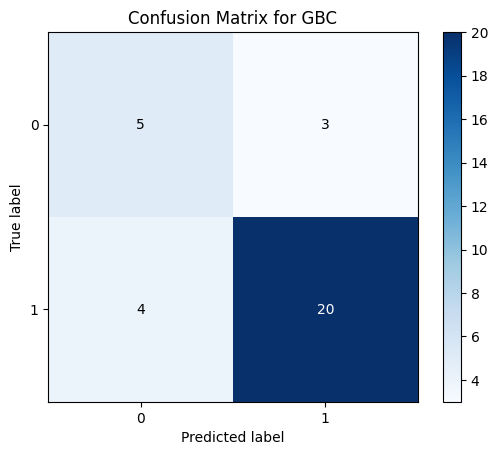

In [11]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title = 'Confusion Matrix for GBC')

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.78125
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.87      0.83      0.85        24

    accuracy                           0.78        32
   macro avg       0.71      0.73      0.72        32
weighted avg       0.79      0.78      0.79        32


### Оценка модели классификации "Развитие ОПП"

- **Точность (Accuracy)**: 78.125%
- **Precision (точность)**:
  - Класс "0" (Отсутствие развития ОПП): 56%
  - Класс "1" (Наличие развития ОПП): 87%
- **Recall (полнота)**:
  - Класс "0": 62%
  - Класс "1": 83%
- **F1-score (F-мера)**:
  - Класс "0": 59%
  - Класс "1": 85%
- **Поддержка (Support)**: 8 для класса "0", 24 для класса "1"

#### Общий вывод:

Модель успешно предсказывает наличие или отсутствие развития ОПП, с высокой точностью и полнотой для случаев с ОПП, и немного хуже для случаев без. Значение F1-меры составляет 79%, что также свидетельствует о хорошем качестве модели.
